In [1]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

### Problem 1

In [2]:
def binomial_func(n:int, p:float):
    """
    Recurssive Binomial Function
    """
    U = np.random.uniform()
    F = 0          # CDF initialization
    K = -1         # k-increment step-counter
    pK = (1-p)**n  # PMF initialization (fly)
    
    while U > F:
        K += 1
        pK *= (n-K)/(K+1) * (p/(1-p))
        F += pK
    return K

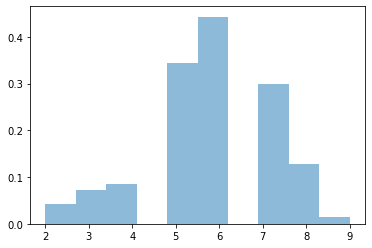

In [19]:
fig, ax = plt.subplots()
N = 10; P = 2/3
X = [binomial_func(N, P) for i in range(100)]
ax.hist(x=X, density=True, alpha=0.5)
plt.show()

### Problem 2

In [2]:
def neg_binomial_func1(r:int, p:float):
    """
    Recurssive Binomial Function
    """
    U = np.random.uniform()
    K = r-1        # k-increment step-counter
    pK = (p)**r    # PMF initialization (fly)
    F = pK         # CDF initialization
    
    while (U > F):
        K += 1
        pK *= (K*(1-p)) / (K+1-r)
        F += pK
    return K

In [5]:
def neg_binomial_func2(r:int, p:float):
    """
    Itterative Binomial Function
    """

    def geometric(p:float):
        """
        Itterative Geometric Random Variable
        """
        I = 0  # indicator for success
        X = 0
        while I == 0:
            U = np.random.uniform()
            if U <= p:
                I = 1
                return X
            else:
                X += 1
    
    total_trials = 0
    for _ in range(r):
        total_trials += geometric(p)
    
    return total_trials

In [6]:
def neg_binomial_func3(r:int, p:float):
    """
    Itterative Binomial Function
    """
    
    def bernoulli(p:float):
        U = np.random.uniform()
        if U <= p:
            return 1
    
    total_trials = 0
    for _ in range(r):
        
        X = 0
        I = 0
        while I == 0:
            V = bernoulli(p)
            if V == 1:
                I = 1
            else:
                X += 1
        
        total_trials += X
    
    return total_trials

In [3]:
R = 2; P = 1/3

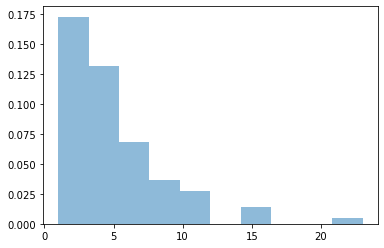

In [4]:
fig, ax = plt.subplots()
X = [neg_binomial_func1(R, P) for i in range(100)]
ax.hist(x=X, density=True, alpha=0.5)
plt.show()

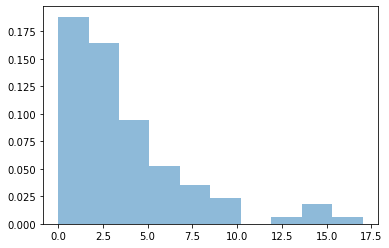

In [8]:
fig, ax = plt.subplots()
X = [neg_binomial_func2(R, P) for i in range(100)]
ax.hist(x=X, density=True, alpha=0.5)
plt.show()

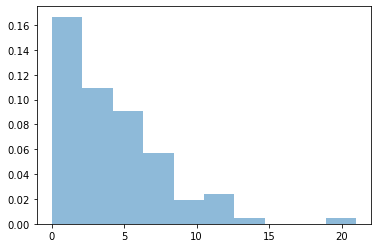

In [74]:
fig, ax = plt.subplots()
X = [neg_binomial_func3(R, P) for i in range(100)]
ax.hist(x=X, density=True, alpha=0.5)
plt.show()

### Problem 3

In [26]:
def special_func():
    """
    Special function from problem 3
    """
    U = np.random.uniform(0,1)
    J = (np.log(U) - np.log(1/2) - np.log(3/4) - np.log(2) + np.log(3)) / (np.log(1/2) + np.log(2) - np.log(3))
    return J

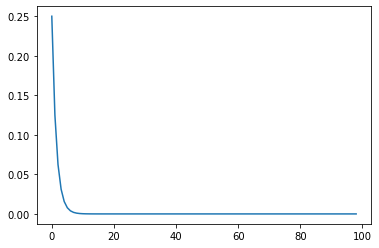

In [30]:
arr = []
for i in range(1, 100):
    # val = (1/2)**(i+1) + (1/2)*(2**(i-1) / 3**i)
    val = (1/2)**(i+1)
    arr.append(val)
plt.plot(arr)
plt.show()

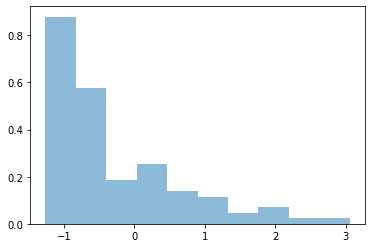

In [28]:
fig, ax = plt.subplots()
X = [special_func() for i in range(100)]
ax.hist(x=X, density=True, alpha=0.5)
plt.show()

### Problem 4

In [9]:
def dice(x:float):
    """
    Simulate a dice roll across a uniform distribution
    """
    interval = 1/6
    if x <= interval:
        return 1
    elif interval < x <= interval * 2:
        return 2
    elif interval * 2 < x <= interval * 3:
        return 3
    elif interval * 3 < x <= interval * 4:
        return 4
    elif interval * 4 < x <= interval * 5:
        return 5
    elif interval * 5 < x:
        return 6

In [10]:
def fair_dice_game():
    """
    Simulate the fair-dice game i.e. counting the total number 
    of rolls before every die possibility concluding the rolls
    """
    
    die_count = {}  # Use dictionary to track which dice run
    count = 0
    while len(die_count) < 6:
        U = np.random.uniform()
        dice_value = dice(U)
        
        if dice_value not in die_count:
            die_count[dice_value] = 1
        else:
            die_count[dice_value] += 1
        
        count += 1
        
    return count 

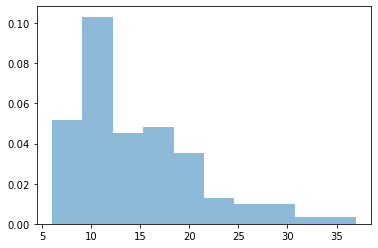

In [25]:
fig, ax = plt.subplots()
X = [fair_dice_game() for i in range(100)]
ax.hist(x=X, density=True, alpha=0.5)
plt.show()